# Mercedes-Benz Greener Manufacturing

 Exploração inicial

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from IPython.display import display
import xgboost as xgb

C:\Users\victo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat([train.drop('y',axis=1),test],axis=0)

In [3]:
train.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [4]:
#feature columns
features_cols = list(train.columns)
print (features_cols)

['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X14

In [5]:
train.shape

(4209, 378)

In [6]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Identificando tipos e valores únicos:**

In [7]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df= dtype_df.groupby('Column Type').agg('count').reset_index()
print (dtype_df)

  Column Type  Count
0       int64    369
1     float64      1
2      object      8


In [8]:
valores_unicos={}
for feature in train.columns:
    if train[feature].dtype != object and feature not in ['ID', 'y']:
        valor_unico = str(np.sort(train[feature].unique().tolist()))
        tlist = valores_unicos.get(valor_unico, [])
        tlist.append(feature)
        valores_unicos[valor_unico] = tlist
for val_unico, feature in valores_unicos.items():
    print("Features com valores unicos: ",val_unico)
    print(feature)
    print("--------------------------------------------------")
        

Features com valores unicos:  [0 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', '

Podemos rodar um PCA antes de tirar esses features, mas acho que é um monte de informação inutil que estraga a análise. Investigando um pouco a relação entre 0 e 1:

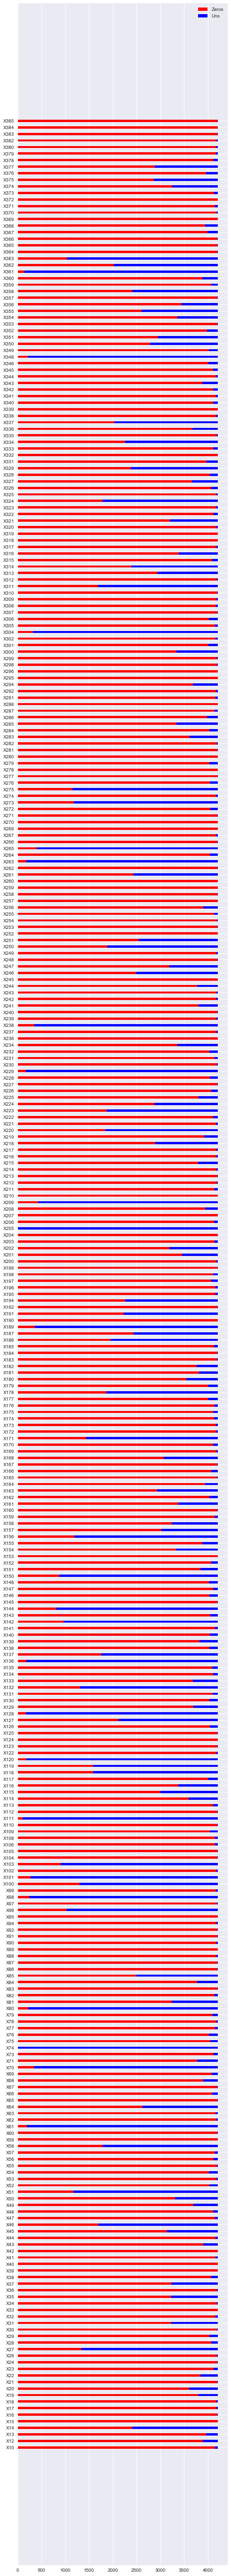

In [9]:
zeros=[]
uns=[]
cols_list = valores_unicos['[0 1]']
for col in cols_list:
    zeros.append((train[col]==0).sum())
    uns.append((train[col]==1).sum())

ind = np.arange(len(cols_list))
width = 0.35

plt.figure(figsize=(8,100))
p1 = plt.barh(ind, zeros, width, color='red')
p2 = plt.barh(ind, uns, width, left=zeros, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zeros', 'Uns'))
plt.show()

Média de y para os features binários:

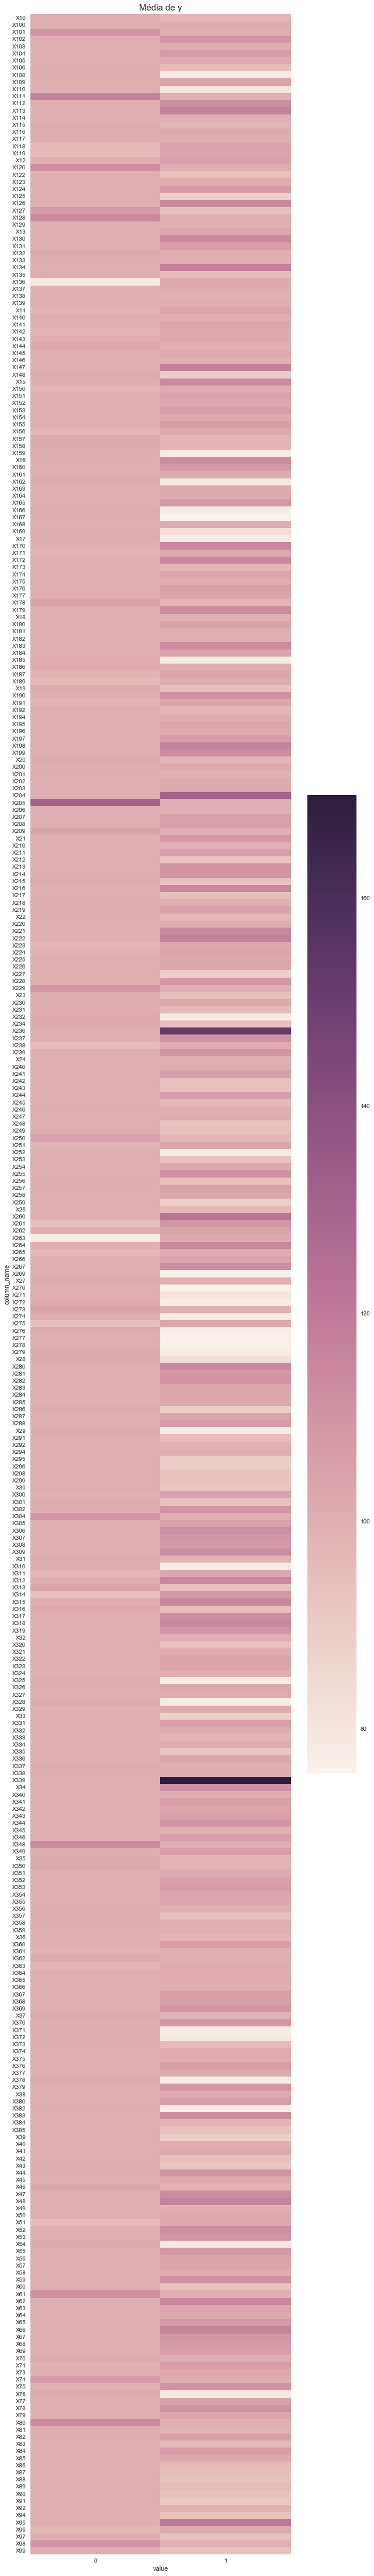

In [10]:
zero_mean_list = []
one_mean_list = []
feature_list = valores_unicos['[0 1]']
for feature in feature_list:
    zero_mean_list.append(train.loc[train[feature]==0].y.mean())
    one_mean_list.append(train.loc[train[feature]==1].y.mean())

new_df = pd.DataFrame({"column_name":feature_list+feature_list, "value":[0]*len(feature_list) + [1]*len(feature_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(10,80))
sea.heatmap(new_df)
plt.title("Média de y", fontsize=15)
plt.show()

**Análise dos atributos categóricos:**

Investigando valores únicos:

In [11]:
cat_unicos={}
for feature in train:
    if train[feature].dtype == object:
        cat_unicos[feature]=len(train[feature].unique().tolist())
display(cat_unicos)        

{'X0': 47, 'X1': 27, 'X2': 44, 'X3': 7, 'X4': 4, 'X5': 29, 'X6': 12, 'X8': 25}

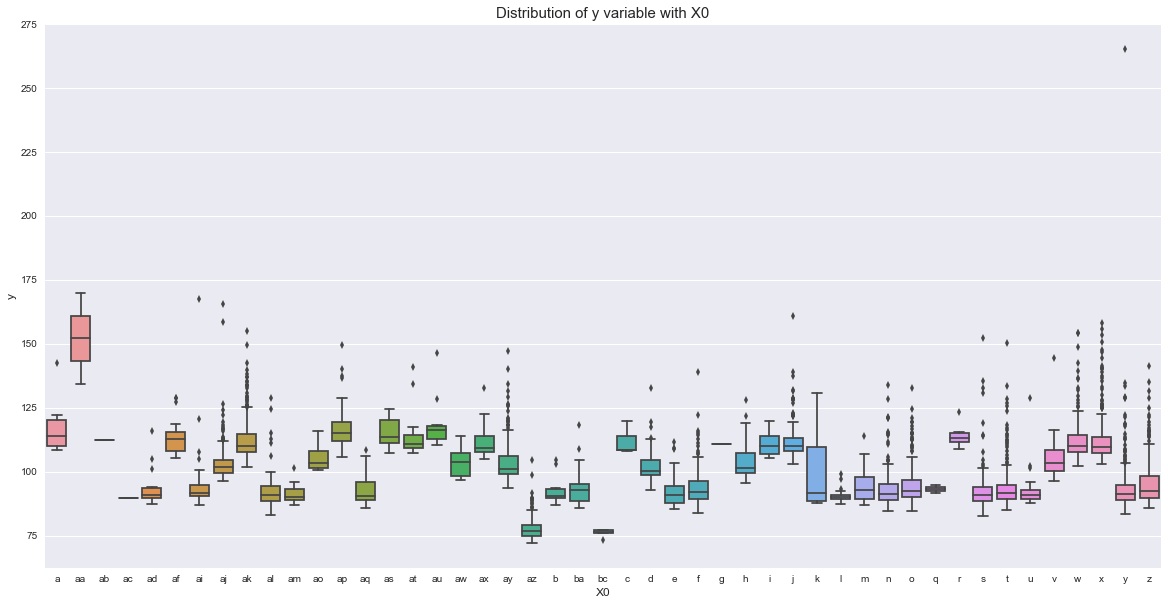

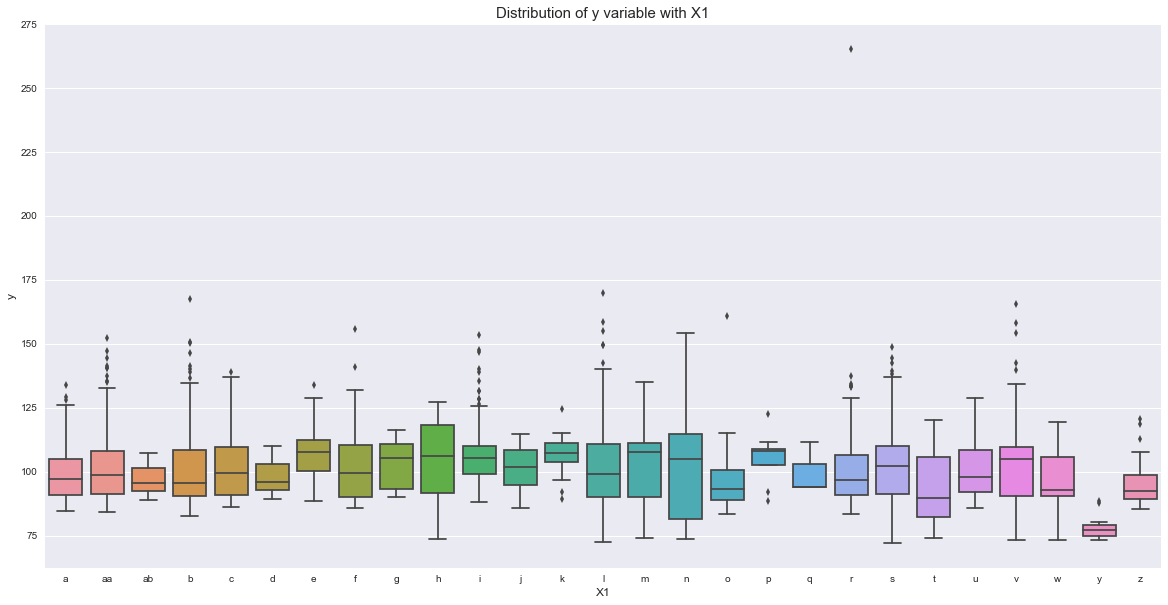

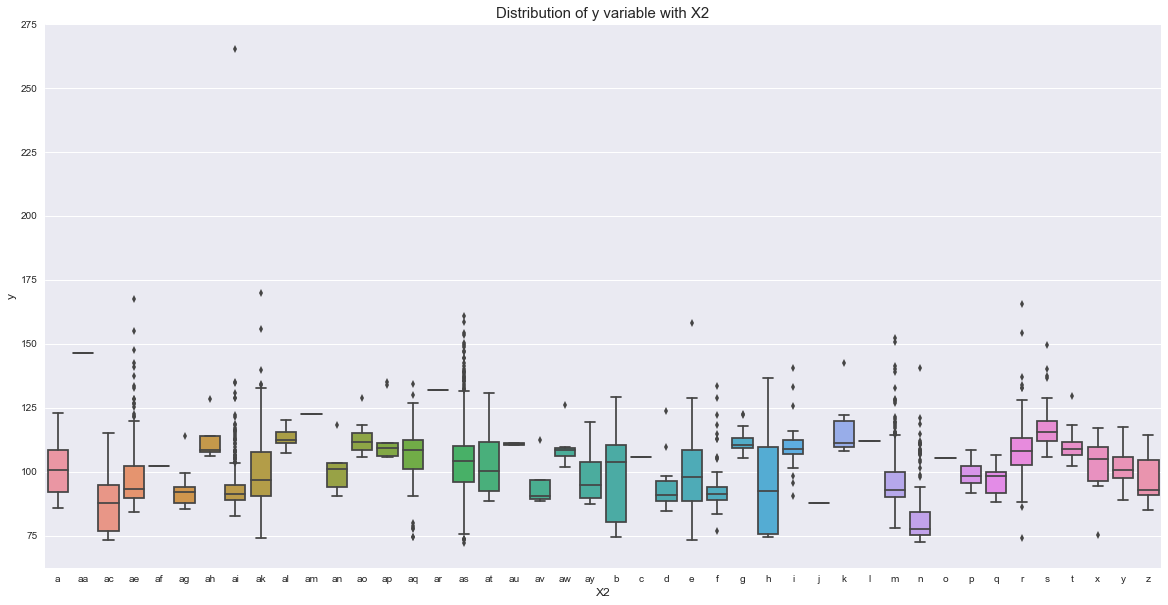

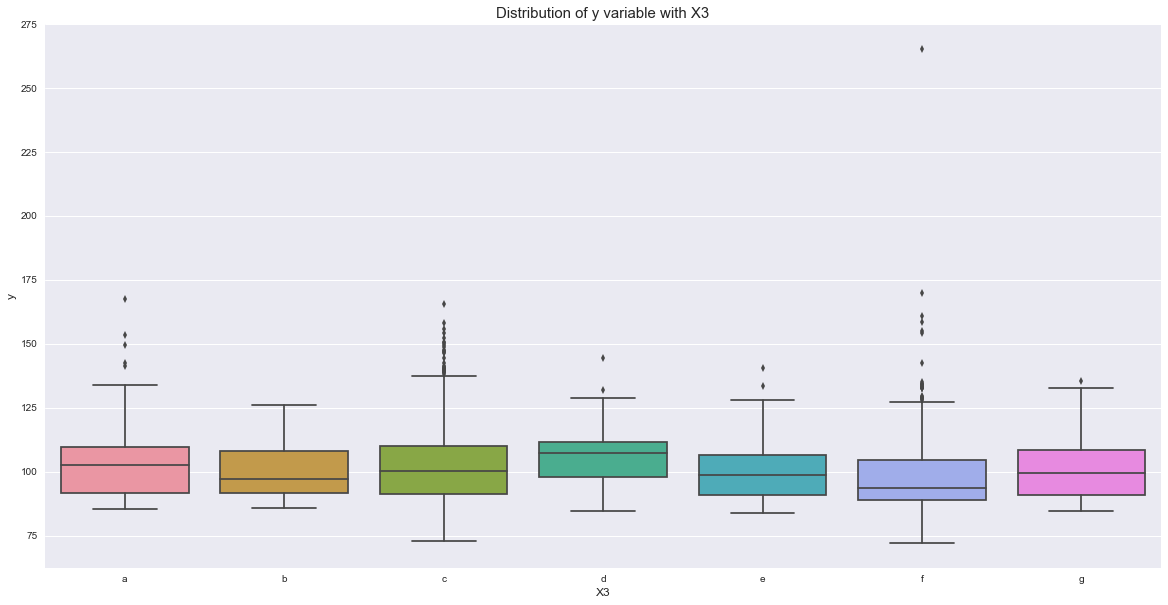

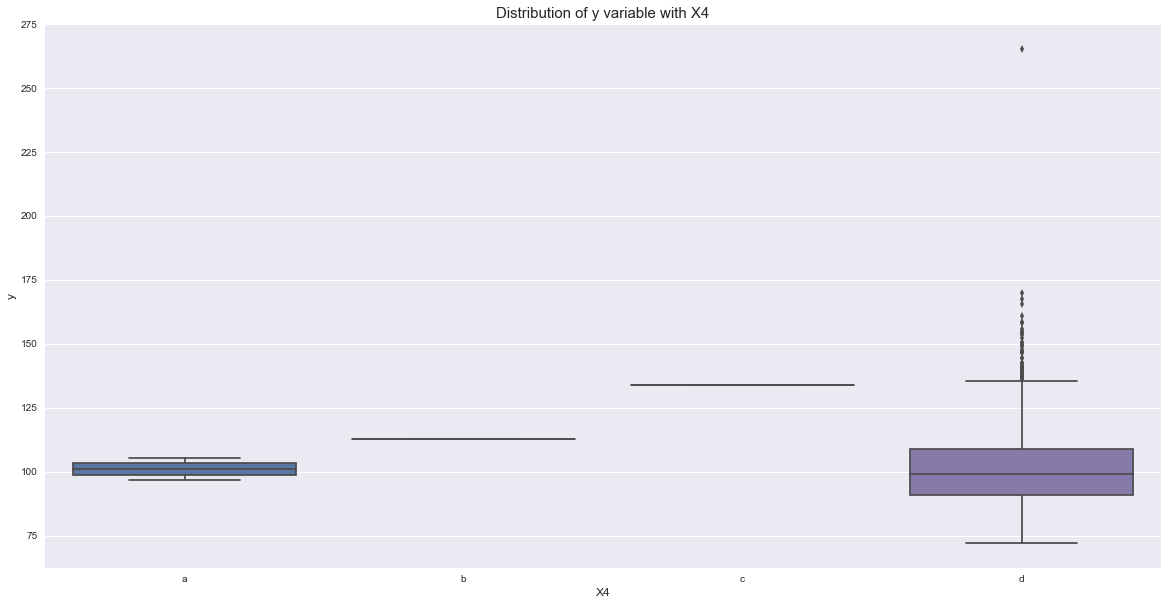

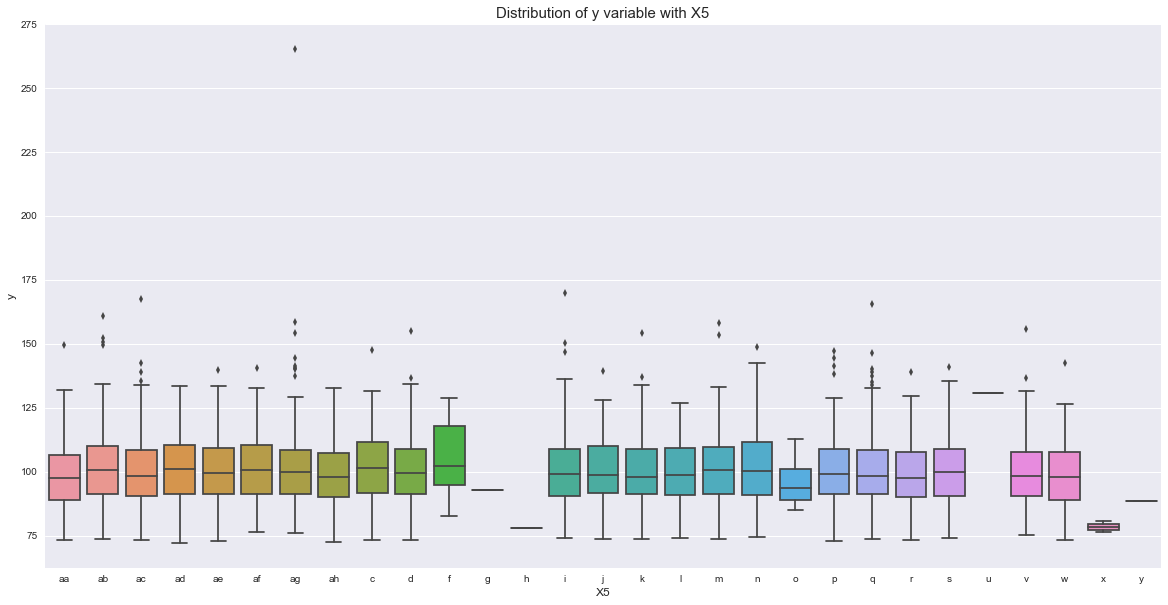

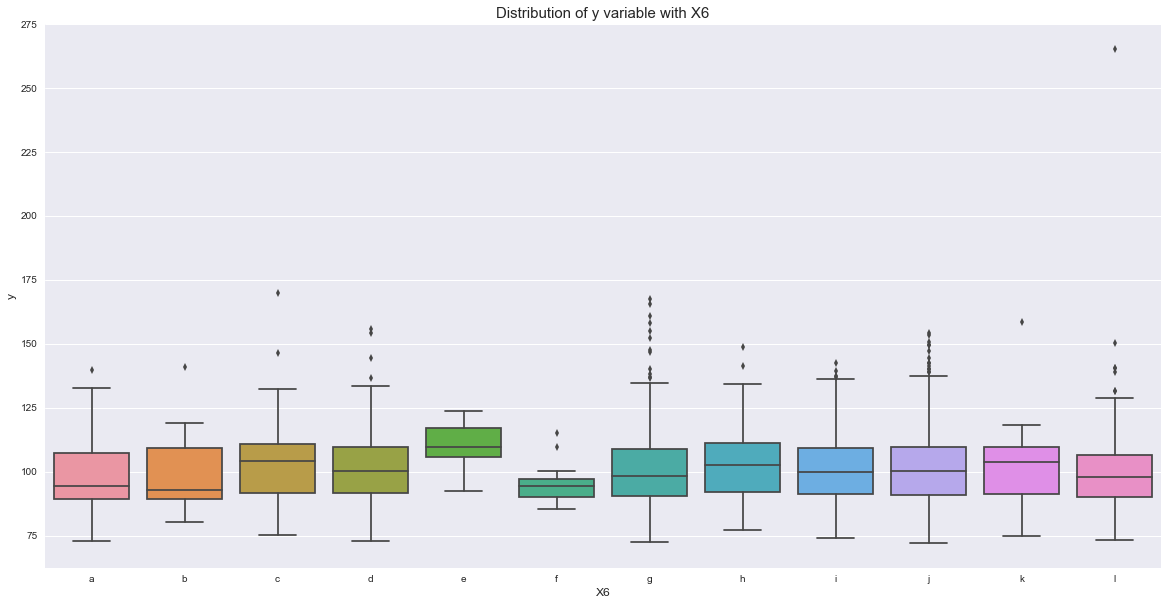

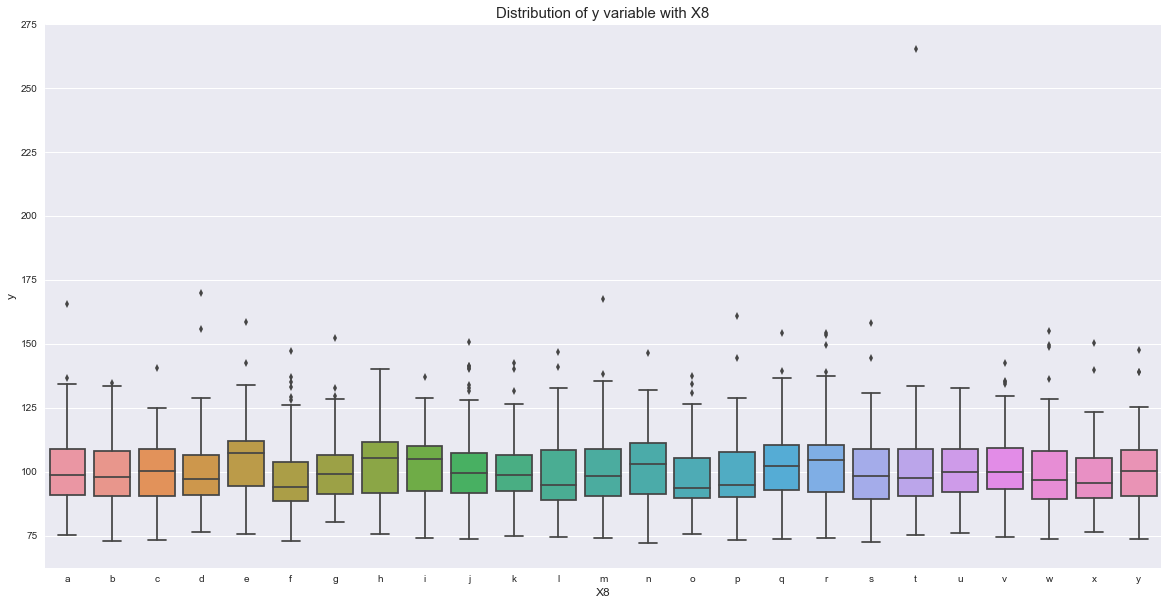

In [12]:
for feature in train:
    if train[feature].dtype == object:
        col_order = np.sort(train[feature].unique()).tolist()
        plt.figure(figsize=(20,10))
        sea.boxplot(x=feature, y='y', data=train, order=col_order)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('y', fontsize=12)
        plt.title("Distribution of y variable with "+feature, fontsize=15)
        plt.show()

Me parece que só X0 afeta realmente a média de Y. Vou mudar o tipo de gráfico para ver dá para observar melhor e depois te mando

**Análise de Y:**

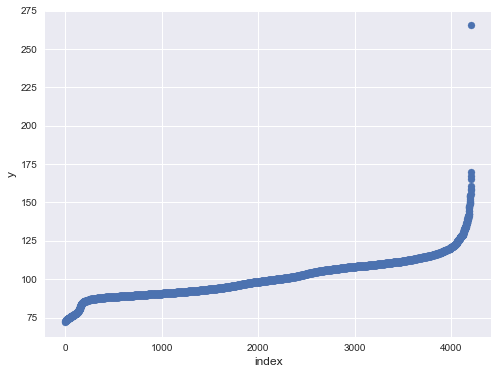

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

Tem um bom candidato a outlier aí.

# Pré processamento

Antes de começar a limpar os dados, vou fazer um one hot encoding nos features categóricos:

In [14]:
all_data.select_dtypes(include=['object']).columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [15]:
def preprocess_features(data):
    
    #Inicializa data frame    
    cf= data.select_dtypes(include=['object']).columns 
    dummies = pd.get_dummies(data[cf])
    
    total =   pd.concat([data.drop(cf,axis=1),dummies],axis=1)     
        
    #Limpando as colunas antigas
      

    return total

all_data_enc = preprocess_features(all_data.drop('ID', axis=1))
print ('Features processados ({} features totais):\n{} '.format(len(all_data_enc.columns), list(all_data_enc.columns)))

Features processados (579 features totais):
['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X1

**Procurando e limpando colunas repetidas:**

Com essa quantidade de features, creio que algumas colunas tenham valores idênticos. Vou limpar as colunas repetidas (train+test):

In [16]:
print ('Número de colunas antes da análise: %d' % len(all_data_enc.columns))
def clean_rep(data):
    c = data.columns
    remover={}

##Isso é só para mostrar as colunas repetidas
    for i in range(len(c)-1):
        v = data[c[i]].values
        for j in range(i+1,len(c)):
            if np.array_equal(v,data[c[j]].values):
                if c[i] not in remover.keys():
                    remover[c[i]]=[]
                remover[c[i]].append(c[j])

                print('Column %s is identical to %s.' % (str(c[i]), str(c[j])))
    print('\nNúmero de colunas com repetição: %d' %(len(remover.keys()))) 
    #Esse método de limpeza apaga também os dtypes. Só é útil utilizar depois antes de limpar as cópias
    data_clean = data.drop(remover,axis=1)    
    return data_clean

data_clean = clean_rep(all_data_enc)

print('\nNúmero de colunas em all_data depois da limpeza: %d' % len(data_clean.columns))

Número de colunas antes da análise: 579
Column X16 is identical to X2_ap.
Column X17 is identical to X382.
Column X23 is identical to X2_f.
Column X26 is identical to X2_b.
Column X28 is identical to X2_n.
Column X30 is identical to X2_ag.
Column X31 is identical to X35.
Column X31 is identical to X37.
Column X32 is identical to X2_a.
Column X33 is identical to X39.
Column X35 is identical to X37.
Column X36 is identical to X2_z.
Column X44 is identical to X302.
Column X48 is identical to X113.
Column X48 is identical to X134.
Column X48 is identical to X147.
Column X48 is identical to X222.
Column X48 is identical to X2_s.
Column X53 is identical to X102.
Column X53 is identical to X214.
Column X53 is identical to X239.
Column X53 is identical to X2_t.
Column X54 is identical to X76.
Column X58 is identical to X324.
Column X59 is identical to X2_au.
Column X60 is identical to X253.
Column X60 is identical to X385.
Column X62 is identical to X172.
Column X62 is identical to X216.
Colum

Acho útil também remover o que é complementar:

In [17]:
#Alta correlaçao
print ('Número de colunas antes da análise: %d' % len(data_clean.columns))
limit = 1.0
remover=[]
c = data_clean.columns
for i in range(len(c)-1):
    for j in range(i+1, len(c)):
        if abs(data_clean[c[i]].corr(data_clean[c[j]]))>=limit:
            print('Correlacao entre %s e %s: %f' % (str(c[i]), str(c[j]),data_clean[c[i]].corr(data_clean[c[j]])))
            if c[i] not in remover:
                remover.append(c[j])
data_clean.drop(remover,axis=1,inplace=True)
print ('Número de colunas após análise: %d' % len(data_clean.columns))

Número de colunas antes da análise: 517
Correlacao entre X263 e X279: -1.000000
Número de colunas após análise: 516


# Análise#

Tinha removido não só o que tinha correlação -1, mas também o que tinha correlação alta (0.98). Algumas outras colunas caíram, mas não vi um ganho na pontuação do Kaggle. Como tem feature pra cacete, vamos sofrer de sobreajuste, mas ainda não encontrei uma maneira de remover as colunas e aumentar a pontuação. A partir daqui vale tudo hahahah

Podemos começar retirando o que tem pouca variância:

In [19]:
from sklearn.feature_selection import VarianceThreshold as VT

def VTSelector(data, pct):
    
    columns = data.columns
    sel = VT(threshold=(pct*(1-pct)))
    sel.fit_transform(data)
    labels = [columns[x] for x in sel.get_support(indices=True) if x]
    
    return pd.DataFrame(sel.fit_transform(data), columns = labels)

data_select = VTSelector(data_clean, 0.95)
data_select.shape

(8418, 145)

!!!!!!!!!!! Fiz um feature selection baseado numa árvore, mas o desempenho foi ruim também:

In [193]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor as dtr
y_train=train['y']
clf=dtr(min_samples_split=2, min)
clf=clf.fit(data_select[:len(train)],y_train)
clf.feature_importances_
transf=SelectFromModel(clf, prefit=True)
data_select=transf.transform(data_select)

In [23]:
data_select=data_clean

Construindo train e test sem colunas repetidas:

In [24]:
train_clean = data_select[:len(train)]
test_clean = data_select[len(train):]
print ('Verificação após limpeza:\nTrain_clean shape: {}\nTest_clean shape: {}'.format(str(train_clean.shape),str(test_clean.shape)))

Verificação após limpeza:
Train_clean shape: (4209, 516)
Test_clean shape: (4209, 516)


PCA:

In [26]:
from sklearn.decomposition import PCA
n_comp = 10
#PCA
pca=PCA(n_components=n_comp, random_state=99, iterated_power='auto', svd_solver='auto')
reduced_train=pca.fit_transform(train_clean)
reduced_test=pca.transform(test_clean)
print ("Dataset reduzido. Variância de cada componente:\n {}\n\nVariância total: {}".format(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_)))

Dataset reduzido. Variância de cada componente:
 [ 0.11499651  0.07836126  0.07270986  0.05839913  0.04719208  0.04047214
  0.03068383  0.02870114  0.02362851  0.02205303]

Variância total: 0.5171974811985094


# Algoritmo

In [28]:
y_train=train['y']
y_mean = np.mean(y_train)
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,    
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean,
    'silent': 1
}

dtrain = xgb.DMatrix(reduced_train, y_train)
dtest = xgb.DMatrix(reduced_test)


cv_result = xgb.cv(xgb_params, 
                  dtrain, 
                   num_boost_round=700, 
                   early_stopping_rounds=50,
                   verbose_eval=50,
                   nfold=10,
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

[0]	train-rmse:12.6448	test-rmse:12.6191
[50]	train-rmse:11.5029	test-rmse:11.5146
[100]	train-rmse:10.6913	test-rmse:10.7425
[150]	train-rmse:10.1138	test-rmse:10.2058
[200]	train-rmse:9.69568	test-rmse:9.83483
[250]	train-rmse:9.37463	test-rmse:9.57081
[300]	train-rmse:9.11942	test-rmse:9.37834
[350]	train-rmse:8.91252	test-rmse:9.23643
[400]	train-rmse:8.74361	test-rmse:9.12927
[450]	train-rmse:8.5978	test-rmse:9.04938
[500]	train-rmse:8.46721	test-rmse:8.98583
[550]	train-rmse:8.34814	test-rmse:8.93697
[600]	train-rmse:8.24193	test-rmse:8.89715
[650]	train-rmse:8.14457	test-rmse:8.86638
700


In [29]:
from sklearn.metrics import r2_score


print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.590565375311


In [32]:
y_pred = model.predict(dtest)
print (y_pred)
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('xgboost-depth{}-pca-ica.csv'.format(xgb_params['max_depth']), index=False)

[  78.46498108   95.78423309   82.28847504 ...,   95.81660461  111.70293427
   94.6900177 ]


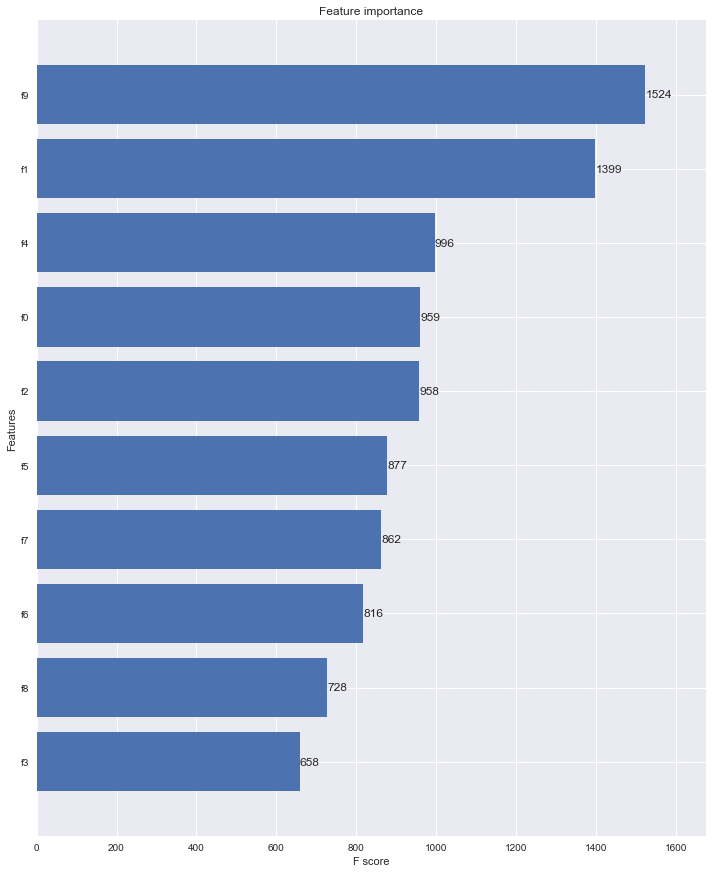

In [33]:
fig, ax = plt.subplots(figsize=(12,15))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()